# Practica 4: Algoritmos Cuánticos II

1. Determina de qué tipo de función se trata: _constante_ o _balanceada_:
    1. Ejecuta la siguiente celda de código, esta definirá una función llamada `oracledj(n)` que recibe `n` y devuelve un circuito cuántico aleatorio con `n+1` qubits correspondientes a una función constante o balanceada.
       - `oracledj(n)` representa $U_f$ en el algoritmo de Deutsch – Jozsa.
       - Dibuja el circuito que regresa la función `oracledj(n)`.
    2. Usa $n=4$. Implementa el algoritmo de Deutsch – Jozsa completo para decidir si $f$ es constante o balanceada.
       - Considera que el qubit de más a la izquierda (en este caso $q_4$) es el qubit auxiliar.
           - Nota que `oracledj(n)` tiene el qubit auxiliar del otro lado comparado con el ejemplo visto en este notebook (Lab4, sección 3).
       - Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
    3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab4).
       - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
    4. Responde claramente de qué tipo de oráculo se trata: constante o balanceado.
       - Usa una celda de markdown.

#### Inciso A:

In [31]:
exec(bytes.fromhex('0a696d706f72742072616e646f6d0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a646566206f7261636c65646a286e293a0a20202020726573756c74203d205175616e74756d43697263756974286e2b31290a20202020726573756c742e6261727269657228290a0a2020202074797065203d2072616e646f6d2e63686f696365285b22636f6e7374616e74222c202262616c616e636564225d290a2020202069662074797065203d3d2022636f6e7374616e74223a0a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a20202020656c73653a0a2020202020202020636f6e74726f6c203d2072616e646f6d2e72616e6472616e6765286e290a2020202020202020726573756c742e637828636f6e74726f6c2c206e290a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a0a20202020726573756c742e6261727269657228290a2020202072657475726e20726573756c740a20202020').decode('utf-8'))

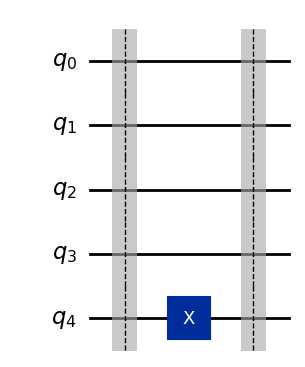

In [131]:
var=oracledj(4) 
var.draw('mpl')

#### Inciso B: 

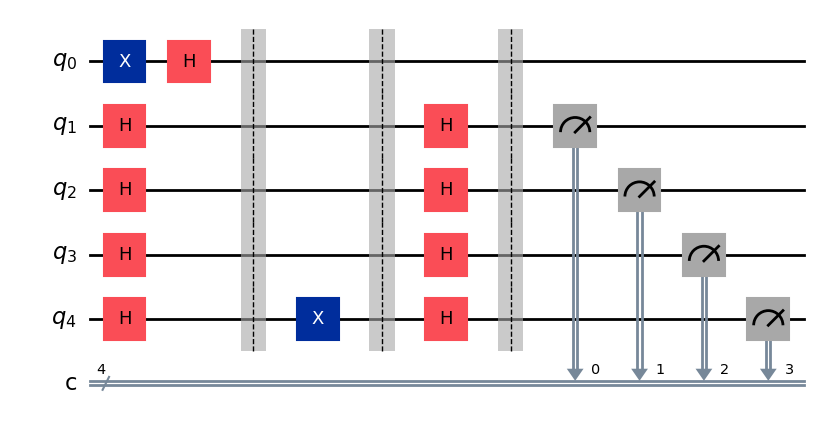

In [132]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

# Crear un circuito cuántico con 5 qubits (4 de entrada y 1 auxiliar) y 4 bits clásicos para la medición
qc = QuantumCircuit(5, 4)

# Paso 1: Inicialización
qc.x(0)  # Aplicar X a q_0
qc.h(0)  # Aplicar H a q_0
qc.h(1)  # Aplicar H a q_1
qc.h(2)  # Aplicar H a q_2
qc.h(3)  # Aplicar H a q_3
qc.h(4)  # Aplicar H a q_4

# Paso 2: Aplicar el oráculo U_f
qc.compose(var, inplace=True)

# Paso 3: Aplicar H a los qubits de entrada
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.barrier()

# Paso 3: Medición de los qubits de entrada
qc.measure([1, 2, 3, 4], [0, 1, 2, 3])
qc.draw('mpl')

El diseño del oráculo **no** revela visualmente si *f* es constante o balanceada, ya que la complejidad y la estructura *Uf* dependen de cómo esté implementada la función, pero no es evidente en la representación gráfica del circuito.
Para determinar si *f* es constante o balanceada, se debe debes ejecutar el circuito y analizar los resultados de la medición final.

#### Inciso C:

dict_keys(['0000'])


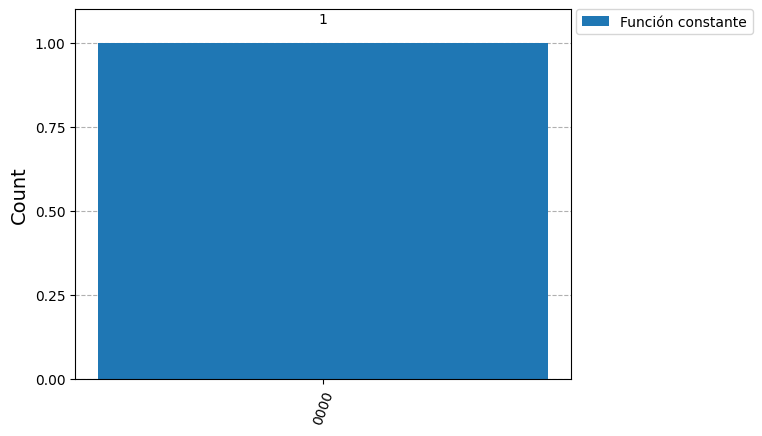

In [141]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

sim_basic = BasicSimulator()                       # usamos el simulador básico

# ejecutar el circuito, una sola vez es suficiente
job_sampler = sim_basic.run(qc, shots=1)   

conteos = job_sampler.result().get_counts()        # obtener los conteos

# determinar que tipo de función se encontró
print(conteos.keys())

if list(conteos.keys())[0] == '1111':
    legend = ["Función balanceada"]
else:
    legend = ["Función constante"]

plot_histogram([conteos], legend=legend)

#### Inciso D:

Dado que el resultado de la simulación es $\ket{0000}$ (todos ceros) se trata de una función **constante** 

#### 

2. Aplica $H^{\otimes 4}$ a $\ket{15}$. ¿Cuál es el resultado?
    1. Escribe tu respuesta mostrando todo el procedimiento.
       - El ejemplo en la sección 4 de este notebooks (Lab4) será de mucha utilidad.
       - Esta respuesta debe estar en el mismo notebook que entregues con el ejercicio 1.
    2. Usa $\LaTeX$ para escribir las expresiones matemáticas.
       - Este y los demás notebooks tienen ejemplos de cómo se escriben estas expresiones, solo da doble click en la celda que quieras revisar.
       - En la segunda celda de este notebook hay unas definiciones que pueden ser de utilidad, cópialas en una celda al inicio de tu notebook para que las puedas usar.
</br>

<div class="alert alert-block alert-info">
<strong>$\ket{x}=\ket{1111}$, aplicar $H^{\otimes 4}$ a $\ket{x}$</strong>: 

$$ $$

Sea la fórmula: $H^{\otimes 4} \ket{x} = \frac{1}{\sqrt{2^n}} \sum\limits_{z=0}^{2^n-1}(-1)^{x \cdot z} \ket{z}$

Notemos que

<table>
    <tr>
        <td align="center">$z$</td>
        <td align="center">$x\cdot z$</td>
        <td align="center">$(-1)^{x\cdot z}$</td>
    </tr>
    <tr>
        <td align="center">$0\to 0000$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$1\to 0001$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$2\to 0010$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$3\to 0011$</td>
        <td align="center">$2$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$4\to 0100$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$5\to 0101$</td>
        <td align="center">$2$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$6\to 0110$</td>
        <td align="center">$2$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$7\to 0111$</td>
        <td align="center">$3$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$8\to 1000$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$9\to 1001$</td>
        <td align="center">$2$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$10\to 1010$</td>
        <td align="center">$2$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$11\to 1011$</td>
        <td align="center">$3$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$12\to 1100$</td>
        <td align="center">$2$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$13\to 1101$</td>
        <td align="center">$3$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$14\to 1110$</td>
        <td align="center">$3$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$15\to 1111$</td>
        <td align="center">$4$</td>
        <td align="center">$1$</td>
    </tr>
</table>

Donde, por ejemplo, como $x=1111$ y si $z=1011$, entonces 

$$x \cdot z = 1111 \cdot 1011 =\sum_{i=1}^4 x_i \cdot z_i \pmod 2 = \left(1\cdot 1 + 1\cdot 0 + 1\cdot 1 + 1\cdot 1\right) \pmod 2 = 3 \pmod 2 = 1$$

De este modo, obtenemos:

$$
H^{\otimes 4} \ket{1111} = \frac{1}{\sqrt{16}}\Big(-\ket{0001}-\ket{0010}-\ket{0100}-\ket{0111}-\ket{1000}+\ket{1011}+\ket{1101}+\ket{1110}+\ket{1111}\Big)
$$


3. **[Opcional]** Implementa el algoritmo de Deutsch usando `spinqit`. Simúlalo.
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - El algoritmo de Deutsch está completo en este mismo notebook (Lab4), solo hay que escribirlo ahora en `spinqit`.
           - Elije un solo oráculo (constante o balanceado).
    2. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 3 en el mismo notebook en el que están los resultados de los ejercicios 1 y 2.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 3 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.
</br>

#### Inciso A:

In [62]:
from spinqit import Circuit
from spinqit import X, H
import numpy as np

#---------------------
## Oráculo Constante
#---------------------

def oracle(n):
    circ_x = Circuit(n + 1)  # +1 para el qubit auxiliar
    q = circ_x.allocateQubits(n + 1)  # Reservar espacio para los qubits

    # Configurar el oráculo de acuerdo a la lógica deseada
    output = np.random.randint(2)
    if output == 1:
        circ_x << (X, q[0])  # Aplicar X al qubit auxiliar si el output es 1

    return circ_x.instructions  # Devolver las instrucciones del oráculo

# Implementación del algoritmo Deutsch
circuit_deutsch = Circuit(3)  # Solo tres qubits
p = circuit_deutsch.allocateQubits(3)

# Paso 1
circuit_deutsch << (X, p[0])

# Paso 2
circuit_deutsch << (H, p[0])
circuit_deutsch << (H, p[1])
circuit_deutsch << (H, p[2])

# Paso 3
oraculo_instructions = oracle(3)  # Obtener instrucciones del oráculo
for instruction in oraculo_instructions:
    circuit_deutsch.append(instruction)  # Agregar instrucciones al circuito

# Paso 4
circuit_deutsch << (H, p[1])

# Mostrar el circuito
print(print_circuit(circuit_deutsch))


[Instruction(gate:X, qubits:[0], clbits:[], params:[]), Instruction(gate:H, qubits:[0], clbits:[], params:[]), Instruction(gate:H, qubits:[1], clbits:[], params:[]), Instruction(gate:H, qubits:[2], clbits:[], params:[]), Instruction(gate:H, qubits:[1], clbits:[], params:[])]


#### Inciso B:

{'000': 256, '001': 256, '100': 256, '101': 256}
{'000': 0.24999999996195055, '001': 0.24999999996195055, '100': 0.24999999996195055, '101': 0.25000000011414836}
[(0.5+0j), (0.5+0j), 0j, 0j, (-0.5+0j), (-0.5+0j), 0j, 0j]



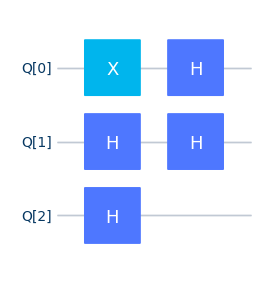

In [63]:
# Simulación del circuito

from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import draw

# Compilador y backend
comp = get_compiler("native")                       # otros compiladores: 'qasm' y 'qiskit'
engine = get_basic_simulator()

# Compilar
optimization_level = 0
exe = comp.compile(circuit_deutsch, optimization_level)
draw(exe)                                           # una vez compilado, se puede dibujar el circuito

# Ejecutar
config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

# Resultados
print(result.counts)
print(result.probabilities)
print(result.states)
print()